In [65]:
# 第一步：导入 svm 模块
from sklearn import svm
from sklearn.metrics import accuracy_score
import sklearn
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,mean_squared_error

In [66]:
fname='C:/Users/zhouzhou/Desktop/SVM/d.csv'
data=np.loadtxt(fname,dtype=float, delimiter=',',encoding='gbk')
print(data)


[[2.77000000e+02 2.82562990e+00 5.67935000e-01 ... 4.86490000e-03
  4.86490000e-03 0.00000000e+00]
 [3.17600000e+03 2.95123000e+00 5.78441010e+01 ... 4.95488000e-01
  4.95488000e-01 1.00000000e+00]
 [1.30600000e+03 3.21308990e+00 8.01935000e-01 ... 6.86930000e-03
  6.86930000e-03 0.00000000e+00]
 ...
 [1.32400000e+03 8.60595990e+00 1.75552002e+02 ... 2.00000000e+00
  2.00000000e+00 1.00000000e+00]
 [3.50000000e+02 8.65841010e+00 2.16001010e+00 ... 1.85025000e-02
  1.85025000e-02 0.00000000e+00]
 [1.99000000e+02 8.65441990e+00 7.76530000e-01 ... 6.65170000e-03
  6.65170000e-03 0.00000000e+00]]


In [67]:
# 第三步：划分训练集和测试集
data_x, label_y = np.split(data,indices_or_sections=(19,), axis=1) # x为数据，y为标签
data_x = data_x[:, 0:2]#为便于后边画图显示，只选取前两维度。若不用画图，可选取前四列x[:,0:4]
train_data, test_data, train_label, test_label = sklearn.model_selection.train_test_split(data_x, label_y, random_state=1, train_size=0.7, test_size=0.3)
#random_state：是随机数的种子。
#　随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。随机数的产生取决于种子，随机数和种子之间的关系遵从以下两个规则：种子不同，产生不同的随机数；种子相同，即使实例不同也产生相同的随机数。

In [68]:
#3.训练svm分类器
classifier=svm.SVC(C=1,kernel='rbf',gamma=5,decision_function_shape='ovr') # ovr:一对多策略
classifier.fit(train_data,train_label.ravel()) #ravel函数在降维时默认是行序优先

SVC(C=1, gamma=5)

In [69]:

# 4.计算 svc 分类器的准确率
# ====== 方法一：classifier.score ======
print('训练集：', classifier.score(train_data, train_label))
print('测试集：', classifier.score(test_data, test_label))
 
# ===== 方法二：accuracy_score =====
train_label_pre = classifier.predict(train_data)
test_label_pre = classifier.predict(test_data)
print('训练集：', accuracy_score(train_label, train_label_pre))
print('测试集：', accuracy_score(test_label, test_label_pre))
 
# 第六步：查看内部决策函数（返回的是样本到超平面的距离）
train_decision_function = classifier.decision_function(train_data)
predict_result = classifier.predict(train_data)
 
print('train_decision_function:', classifier.decision_function(train_data))
print('predict_result:', classifier.predict(train_data))


训练集： 0.9946595460614153
测试集： 0.5700934579439252
训练集： 0.9946595460614153
测试集： 0.5700934579439252
train_decision_function: [ 0.69481921  0.68537647 -1.00000793 -1.00011272 -1.00002662 -1.00003274
 -1.00003695 -1.0001182  -1.00001833 -0.99969403  0.69452478  0.69481921
  0.6948194   0.69854554 -1.00048753  0.69537715  0.69481921  0.69481921
 -0.22159591 -1.00036366 -0.99989754 -1.00012478  0.70094889 -1.00022291
 -1.00003457  0.69481921  0.99979831 -1.00018493  0.69481921 -0.99963336
 -0.99951941 -0.99963401  0.69481921 -0.3884688   0.69481921  0.69481921
 -1.00001979  0.69483797 -0.99959394 -0.99960261 -0.99993339 -0.9904799
 -1.00028586  0.69481921 -1.00003376 -1.00003481  0.69481921 -1.00001393
 -0.99960889  0.69481921 -1.00003417 -0.99962932  0.65004555 -1.00004886
  0.69481233  0.97531711  0.69816746 -0.99964855  0.69481921 -0.81311244
  0.69481921 -0.99958764 -1.00003457 -1.00023141 -0.99960136 -0.99972431
 -0.99972417  0.69481921 -0.99964839  0.69481921  0.69481921  0.69481921
  0.

C:\Users\zhouzhou\AppData\Local\Temp\ipykernel_31036\4148832910.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # 预测值的显示


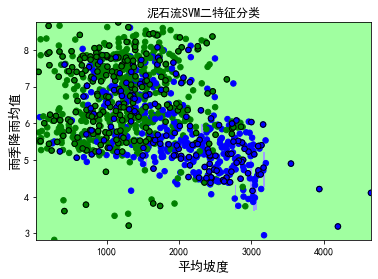

In [70]:
# 第七步：绘图
# 确定坐标轴范围
x1_min, x1_max = data_x[:, 0].min(), data_x[:, 0].max()  # 第0维特征的范围
x2_min, x2_max = data_x[:, 1].min(), data_x[:, 1].max()  # 第1维特征的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网络采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
 
# 指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
 
# 设置颜色
cm_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r', 'b'])
 
grid_hat = classifier.predict(grid_test)  # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
 
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(data_x[:, 0], data_x[:, 1], c=label_y[:, 0], s=30, cmap=cm_dark)  # 样本
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label[:, 0], s=30, edgecolors='k', zorder=2,
            cmap=cm_dark)  # 圈中测试集样本点
plt.xlabel('平均坡度', fontsize=13)
plt.ylabel('雨季降雨均值', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('泥石流SVM二特征分类')
plt.show()

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()


In [86]:
print(len(train_label))
clf = GridSearchCV(svc, param_grid)
clf.fit(train_data,train_label)
print(clf.best_params_,clf.best_score_)


749


D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\software\Python3.9\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'C': 100, 'kernel': 'linear'} 0.7356599552572707


In [87]:
#3.训练svm分类器
classifier=svm.SVC(C=100,kernel='linear',decision_function_shape='ovr') # ovr:一对多策略
classifier.fit(train_data,train_label.ravel()) #ravel函数在降维时默认是行序优先

SVC(C=100, kernel='linear')

In [88]:

# 4.计算 svc 分类器的准确率
# ====== 方法一：classifier.score ======
print('训练集：', classifier.score(train_data, train_label))
print('测试集：', classifier.score(test_data, test_label))

训练集： 0.732977303070761
测试集： 0.7071651090342679


C:\Users\zhouzhou\AppData\Local\Temp\ipykernel_31036\4148832910.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # 预测值的显示


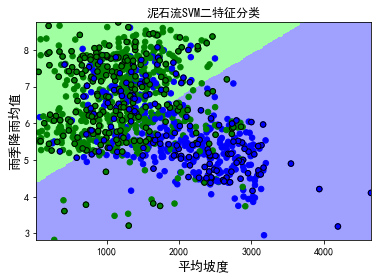

In [89]:
# 第七步：绘图
# 确定坐标轴范围
x1_min, x1_max = data_x[:, 0].min(), data_x[:, 0].max()  # 第0维特征的范围
x2_min, x2_max = data_x[:, 1].min(), data_x[:, 1].max()  # 第1维特征的范围
x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]  # 生成网络采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
 
# 指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
 
# 设置颜色
cm_light = matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r', 'b'])
 
grid_hat = classifier.predict(grid_test)  # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
 
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(data_x[:, 0], data_x[:, 1], c=label_y[:, 0], s=30, cmap=cm_dark)  # 样本
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_label[:, 0], s=30, edgecolors='k', zorder=2,
            cmap=cm_dark)  # 圈中测试集样本点
plt.xlabel('平均坡度', fontsize=13)
plt.ylabel('雨季降雨均值', fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('泥石流SVM二特征分类')
plt.show()